In [1]:
import numpy as np
import matplotlib.pyplot as plt

iris = np.genfromtxt('iris_full.csv', delimiter=',', skip_header=1) 

X = iris[:, :4]
y = iris[:, 4]

intercept = np.ones((X.shape[0], 1))
X = np.concatenate((intercept, X), axis=1)

# shuffle
inds = np.arange(X.shape[0])
np.random.shuffle(inds)

X = X[inds]
y = y[inds]

print(X.shape)
print(y.shape)

(100, 5)
(100,)


In [2]:
def tanh_function(z):
    return (np.exp(z) - np.exp(-z)) / (np.exp(z) + np.exp(-z))

def loss_function(y_hat, y):
    h_scale = (y_hat + 1)/2
    return (-y * np.log(h_scale) - (1 - y) * np.log(1 - h_scale)).mean()

def predict(X, theta):    
    y_hat = tanh_function(np.dot(X, theta))
    return y_hat

def compute_gradient(X, y_hat, y):
    return np.dot(X.T, (y_hat + 1 - 2*y)) / y.size


lr=0.01
num_iter=5000

theta = np.random.normal(0.0, 0.01, (5,))
losses = []
accs   = []

for i in range(num_iter):
    # predict output
    y_hat = predict(X, theta)
    
    # compute loss
    loss = loss_function(y_hat, y)

    # compute mean of gradient
    gradient = compute_gradient(X, y_hat, y)
    
    # update 
    theta -= lr*gradient  
    

    # for debug
    losses.append(loss)

    # accuracy for training
    preds = predict(X, theta).round()/2 + 0.5
    acc = (preds == y).mean()
    accs.append(acc)  

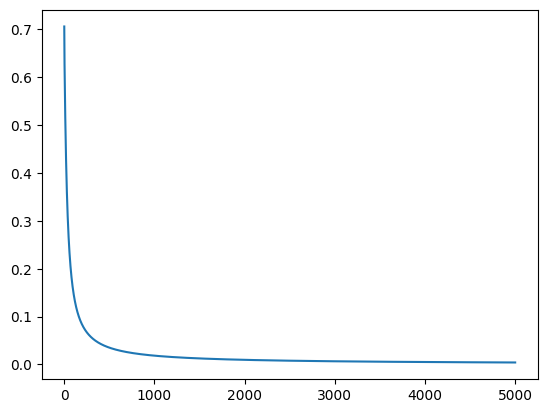

In [3]:
# show figures
plt.plot(losses)
plt.show()

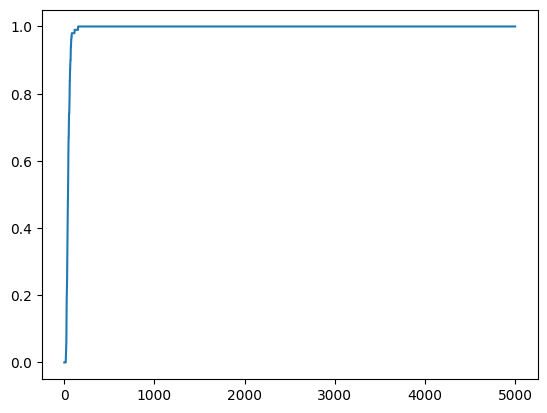

In [4]:
plt.plot(accs)
plt.show()

In [14]:
preds = predict(X, theta).round()/2 + 0.5
print(preds)
print(y)

[0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 1.
 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 1. 1. 1. 0. 1. 0.
 1. 1. 0. 0. 0. 1. 1. 0. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 1. 1.
 0. 1. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0.
 1. 0. 1. 0.]
[0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 1.
 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 1. 1. 1. 0. 1. 0.
 1. 1. 0. 0. 0. 1. 1. 0. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 1. 1.
 0. 1. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0.
 1. 0. 1. 0.]
